READ ME for THIS VISUAL
 
(First, thank for your individual help for this visual! This all makes so much more sense. For practice I redid the code on my other 2 visuals to create 2 secondary cleaned csv's that are much smaller in size for GitHub usability.)

Description:
This script processes approved housing maintenance code violations in New York City from 2019 to 2024, aggregating the number of approved violations by year. The output includes a cleaned CSV file (final_dateCounts.csv) and a bar chart visualization (violations_by_year_2019_2024.png) showing the annual violation totals.

Files Used:
'approved19_24.csv': Original file containing approval dates for violations between 2019 and 2024.
'approvedDateCounts.csv': File containing pre-counted totals for each approval date.
'final_dateCounts.csv': Final, reduced dataset containing only approval dates and violation counts (used for plotting).
                                                                                                   
Data Cleaning & Processing Steps:
Load Raw Data
Load two source CSVs — one with raw approval dates 'approved19_24.csv' and one with violation counts 'approvedDateCounts.csv'.
Combine Columns
Merge the Counts column number of violations per date with the corresponding ApprovedDate values.
Save Cleaned CSV
Save the smaller, focused DataFrame with only the two necessary columns: ApprovedDate and Counts.
Convert Dates to Years
Use pd.to_datetime() to convert the ApprovedDate column and extract the year component.
Aggregate by Year
Group the data by year and sum total violation counts for each.
                                               
Visualization
A bar chart 'violations_by_year_2019_2024.png' is generated to show the total number of approved violations for each year from 2019 to 2024.
X-axis: Year
Y-axis: Number of approved violations
Color: Dark purple (rebeccapurple)
Total Count: Nearly 4.6 million violations approved over this 6-year period.

In [15]:
import pandas as pd

# Load file (adjust path if needed)
df = pd.read_csv("data/approvedDateCounts.csv")
dfDate = pd.read_csv("data/approved19_24.csv")

# Show the first 10 rows
print(df.head())
print(dfDate.head())

   ApprovedDate
0          1784
1          2120
2          1973
3           781
4           949
  ApprovedDate
0   01/02/2019
1   01/03/2019
2   01/04/2019
3   01/05/2019
4   01/06/2019


In [17]:
print(len(df))
print(len(dfDate))

2190
2190


In [25]:
df_dateCounts = dfDate
df_dateCounts["Counts"] = df["ApprovedDate"]

In [27]:
df_dateCounts

,ApprovedDate,Counts
0,01/02/2019,1784
1,01/03/2019,2120
2,01/04/2019,1973
3,01/05/2019,781
4,01/06/2019,949
...,...,...
2185,12/27/2024,2233
2186,12/28/2024,1362
2187,12/29/2024,1094
2188,12/30/2024,2718


In [35]:
df_dateCounts.to_csv("data/final_dateCounts.csv")

Year
2019    668537
2020    425169
2021    767135
2022    859657
2023    878411
Name: Counts, dtype: int64


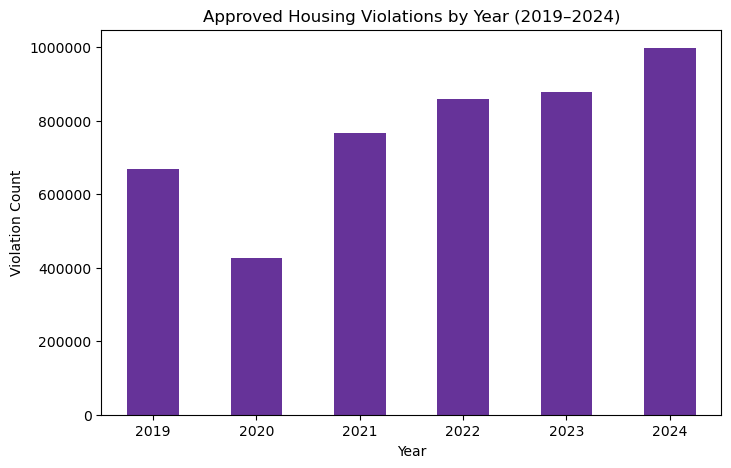

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data
df = pd.read_csv("data/final_dateCounts.csv")

# Step 3: Convert 'approveddate' to datetime
df['ApprovedDate'] = pd.to_datetime(df['ApprovedDate'], errors='coerce')

# Extract year from the 'Date' column
df['Year'] = df["ApprovedDate"].dt.year

# 2. Group by 'Year' and sum the values of 'Value_A' and 'Value_B'
# You can use .mean(), .sum(), etc., depending on your aggregation needs
grouped_df = df.groupby('Year')["Counts"].sum()

print(grouped_df.head())


#df.plot(x="ApprovedDate", y="Counts", kind="bar")

# Step 8: Plot
plt.figure(figsize=(8, 5))
grouped_df.plot(kind="bar", color="rebeccapurple")
plt.title("Approved Housing Violations by Year (2019–2024)")
plt.xlabel("Year")
plt.ylabel("Violation Count")
plt.xticks(rotation=0)

# Disable scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')
plt.savefig("violations_by_year_2019_2024.png", bbox_inches='tight')
plt.show()


